# Étape 1 : Chargement et Prétraitement des Données


1.1. Importation des Bibliothèques Nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score



1.2. Chargement des Données

In [4]:
data = pd.read_csv('dataset_transactions.csv')

1.3. Inspection Initiale des Données

In [5]:
data.shape

(3007380, 13)

In [6]:
data.head(10)

,step,typeTransaction,montant,NumeroCompte,oldbalanceOrg,newbalanceOrig,Agence,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,NomClient,dateCreation
0,1,PAYMENT,9839.64,1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,Kamal,2020-01-01 01:00:00
1,1,PAYMENT,1864.28,1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,Hmidouch,2020-01-01 01:00:00
2,1,TRANSFER,181.00,1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,Wahida,2020-01-01 01:00:00
3,1,CASH_OUT,181.00,840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,Masouda,2020-01-01 01:00:00
4,1,PAYMENT,11668.14,2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,Lounes,2020-01-01 01:00:00
5,1,PAYMENT,7817.71,90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,Rahiba,2020-01-01 01:00:00
6,1,PAYMENT,7107.77,154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,Chafik,2020-01-01 01:00:00
7,1,PAYMENT,7861.64,1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,Ikram,2020-01-01 01:00:00
8,1,PAYMENT,4024.36,1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,Sabri,2020-01-01 01:00:00
9,1,DEBIT,5337.77,712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,Ilham,2020-01-01 01:00:00


In [7]:
data.tail(10)

,step,typeTransaction,montant,NumeroCompte,oldbalanceOrg,newbalanceOrig,Agence,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,NomClient,dateCreation
3007370,232,PAYMENT,5516.03,1941032634,0.0,0.00,M1150160905,0.00,0.00,0,0,Saloua,2020-01-10 16:00:00
3007371,232,PAYMENT,18036.97,956421903,0.0,0.00,M385200113,0.00,0.00,0,0,Elbatoul,2020-01-10 16:00:00
3007372,232,PAYMENT,1737.22,1808562059,0.0,0.00,M1609972899,0.00,0.00,0,0,Nader,2020-01-10 16:00:00
3007373,232,CASH_OUT,182840.20,1761096189,306949.0,124108.80,C742014624,5741479.54,5924319.74,0,0,Bachira,2020-01-10 16:00:00
3007374,232,PAYMENT,9288.67,1405718836,124108.8,114820.12,M1529992425,0.00,0.00,0,0,Yousri,2020-01-10 16:00:00
3007375,232,CASH_OUT,382708.04,894232584,42051.0,0.00,C1977676858,0.00,382708.04,0,0,Elamria,2020-01-10 16:00:00
3007376,232,PAYMENT,8574.41,479346821,20143.0,11568.59,M55386642,0.00,0.00,0,0,Fattoum,2020-01-10 16:00:00
3007377,232,PAYMENT,21185.83,1443768334,15597.0,0.00,M72390255,0.00,0.00,0,0,Hosni,2020-01-10 16:00:00
3007378,232,PAYMENT,1427.33,180910088,89991.0,88563.67,M1627358961,0.00,0.00,0,0,Elmakki,2020-01-10 16:00:00
3007379,232,TRANSFER,310100.39,1192660152,15395.0,0.00,C1210727974,946961.58,1257061.97,0,0,Chafik,NaN


In [8]:
data.dtypes

,0
step,int64
typeTransaction,object
montant,float64
NumeroCompte,int64
oldbalanceOrg,float64
newbalanceOrig,float64
Agence,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


In [9]:
data.describe()

,step,montant,NumeroCompte,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,3.007380e+06,3.007380e+06,3.007380e+06,3.007380e+06,3.007380e+06,3.007380e+06,3.007380e+06,3.007380e+06,3.007380e+06
mean,1.244908e+02,1.585568e+05,1.073628e+09,8.474932e+05,8.690255e+05,9.956932e+05,1.103713e+06,8.708577e-04,3.325153e-07
std,7.637723e+01,2.685473e+05,6.198262e+08,2.919226e+06,2.955665e+06,2.302373e+06,2.385678e+06,2.949745e-02,5.766414e-04
min,1.000000e+00,0.000000e+00,2.448000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.800000e+01,1.267318e+04,5.371635e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.430000e+02,7.667777e+04,1.073426e+09,1.467220e+04,0.000000e+00,1.380566e+05,2.249139e+05,0.000000e+00,0.000000e+00
75%,1.870000e+02,2.124077e+05,1.609915e+09,1.141555e+05,1.541064e+05,9.455829e+05,1.131264e+06,0.000000e+00,0.000000e+00
max,2.320000e+02,1.000000e+07,2.147484e+09,3.893942e+07,3.894623e+07,4.265577e+07,4.265577e+07,1.000000e+00,1.000000e+00


In [10]:
data.isnull().sum()

,0
step,0
typeTransaction,0
montant,0
NumeroCompte,0
oldbalanceOrg,0
newbalanceOrig,0
Agence,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [11]:
data['typeTransaction'].value_counts()

,count
typeTransaction,
CASH_OUT,1070027
PAYMENT,1008634
CASH_IN,660597
TRANSFER,249257
DEBIT,18865


In [12]:
data.head()

,step,typeTransaction,montant,NumeroCompte,oldbalanceOrg,newbalanceOrig,Agence,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,NomClient,dateCreation
0,1,PAYMENT,9839.64,1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,Kamal,2020-01-01 01:00:00
1,1,PAYMENT,1864.28,1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,Hmidouch,2020-01-01 01:00:00
2,1,TRANSFER,181.00,1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,Wahida,2020-01-01 01:00:00
3,1,CASH_OUT,181.00,840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,Masouda,2020-01-01 01:00:00
4,1,PAYMENT,11668.14,2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,Lounes,2020-01-01 01:00:00


1.6. Normalisation/Standardisation des Données Numériques

In [13]:
scaler = StandardScaler()
numerical_features = ['montant', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [16]:
data.tail()

,step,typeTransaction,montant,NumeroCompte,oldbalanceOrg,newbalanceOrig,Agence,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,NomClient,dateCreation
3007375,232,CASH_OUT,0.834681,894232584,-0.275910,-0.294020,C1977676858,-0.432464,-0.302222,0,0,Elamria,2020-01-10 16:00:00
3007376,232,PAYMENT,-0.558495,479346821,-0.283414,-0.290106,M55386642,-0.432464,-0.462641,0,0,Fattoum,2020-01-10 16:00:00
3007377,232,PAYMENT,-0.511534,1443768334,-0.284972,-0.294020,M72390255,-0.432464,-0.462641,0,0,Hosni,2020-01-10 16:00:00
3007378,232,PAYMENT,-0.585109,180910088,-0.259487,-0.264056,M1627358961,-0.432464,-0.462641,0,0,Elmakki,2020-01-10 16:00:00
3007379,232,TRANSFER,0.564309,1192660152,-0.285041,-0.294020,C1210727974,-0.021166,0.064279,0,0,Chafik,NaN


# Étape 2 : Analyse Exploratoire des Données (EDA)

<ipython-input-18-d91e4fa6b7d4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x='typeTransaction',palette='coolwarm')


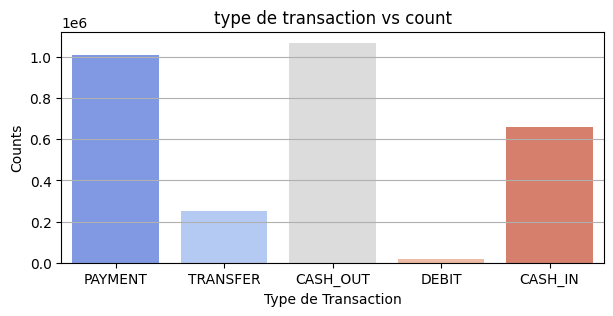

In [18]:
plt.figure(figsize=(7,3))
plt.title('type de transaction vs count')
sns.countplot(data=data,x='typeTransaction',palette='coolwarm')
plt.xlabel('Type de Transaction')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=1)
plt.show()

### Distribution de la Variable Cible

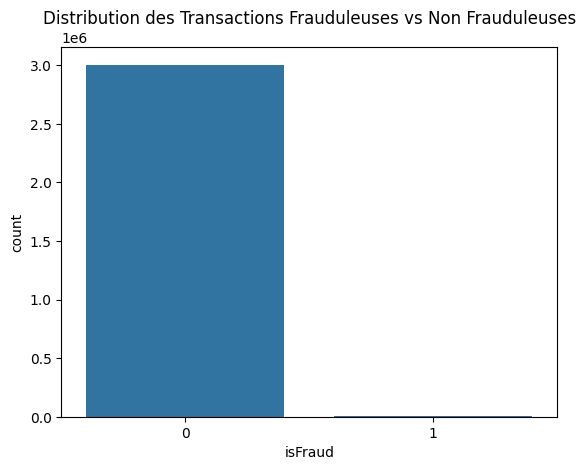

isFraud
0    99.912914
1     0.087086
Name: proportion, dtype: float64


In [19]:
sns.countplot(x='isFraud', data=data)
plt.title('Distribution des Transactions Frauduleuses vs Non Frauduleuses')
plt.show()

# Afficher les pourcentages
fraud_percentage = data['isFraud'].value_counts(normalize=True) * 100
print(fraud_percentage)

### Analyse des Caractéristiques en Fonction de la Fraude

Comparaison des montants des transactions:




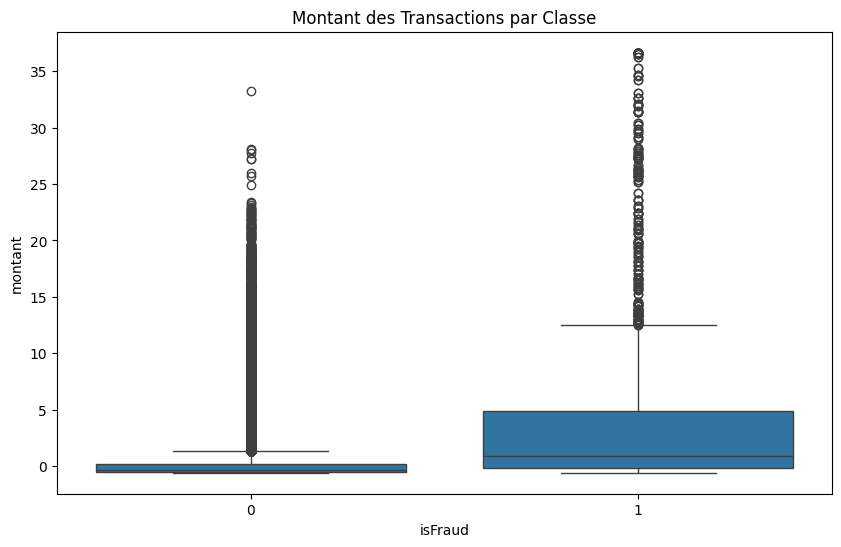

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='isFraud', y='montant', data=data)
plt.title('Montant des Transactions par Classe')
plt.show()

Analyse des types de transactions impliqués dans la fraude :

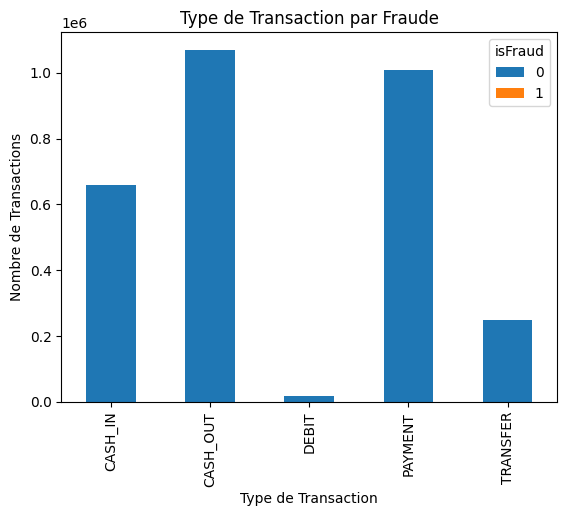

In [21]:
fraud_by_type = data.groupby(['typeTransaction', 'isFraud']).size().unstack()
fraud_by_type.plot(kind='bar', stacked=True)
plt.title('Type de Transaction par Fraude')
plt.xlabel('Type de Transaction')
plt.ylabel('Nombre de Transactions')
plt.show()


Analyse des soldes avant et après transaction :

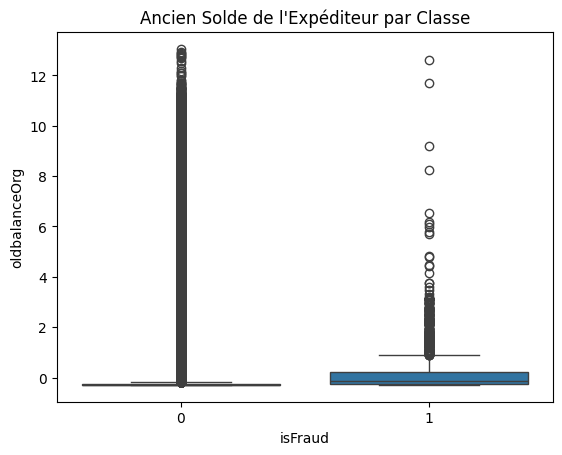

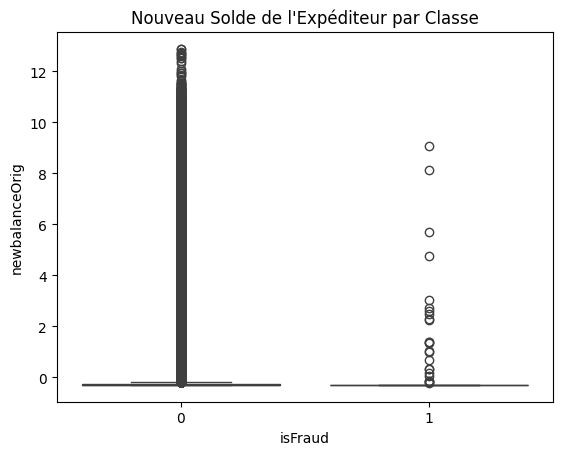

In [22]:
# Old Balance Origin
sns.boxplot(x='isFraud', y='oldbalanceOrg', data=data)
plt.title('Ancien Solde de l\'Expéditeur par Classe')
plt.show()

# New Balance Origin
sns.boxplot(x='isFraud', y='newbalanceOrig', data=data)
plt.title('Nouveau Solde de l\'Expéditeur par Classe')
plt.show()


Corrélation entre les variables :

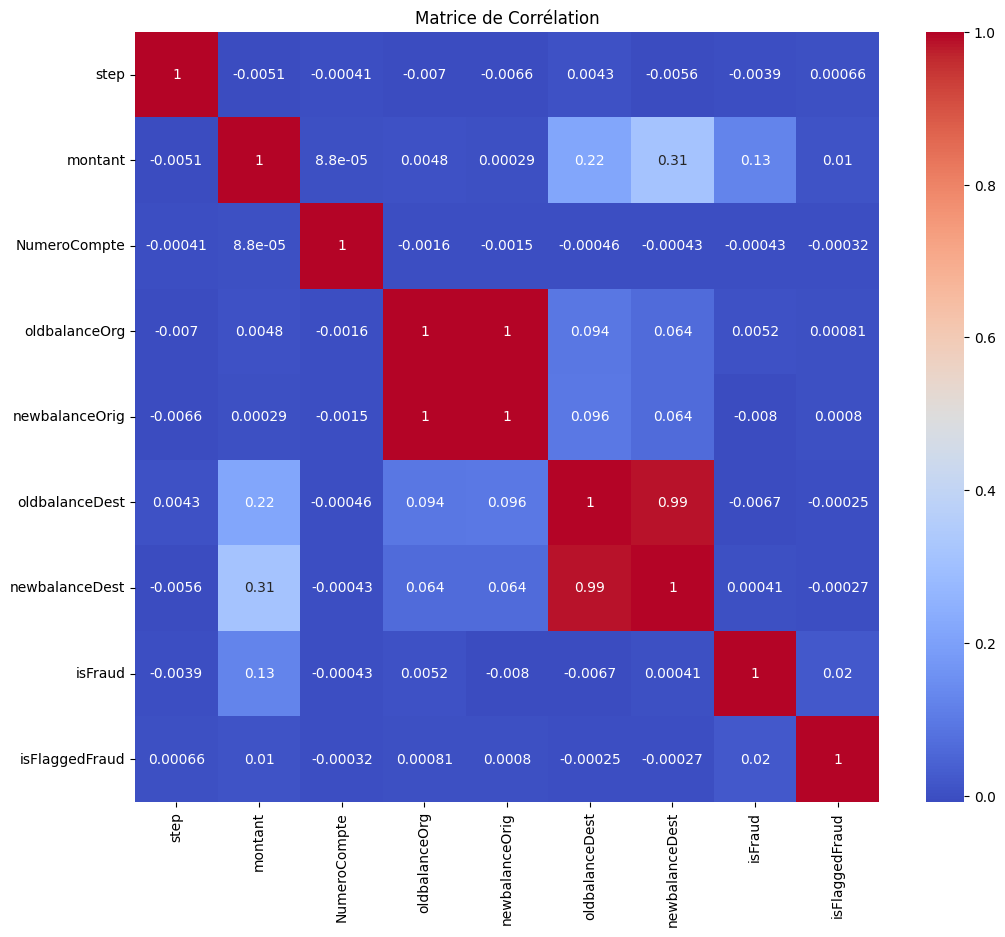

In [23]:
plt.figure(figsize=(12,10))
numerical_data = data.select_dtypes(include=['float64', 'int64'])
corr = numerical_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()



Encodage des Variables Catégoriques

In [24]:
data['typeTransaction'].replace({'CASH_OUT':0, 'PAYMENT':1, 'CASH_IN':2, 'TRANSFER':3, 'DEBIT':4}, inplace=True)

Supprimer donnees inutiles:

In [25]:
data = data.drop(['isFlaggedFraud'], axis=1)

In [26]:
data.head()

,step,typeTransaction,montant,NumeroCompte,oldbalanceOrg,newbalanceOrig,Agence,oldbalanceDest,newbalanceDest,isFraud,NomClient,dateCreation
0,1,1,-0.553784,1231006815,-0.232033,-0.239787,M1979787155,-0.432464,-0.462641,0,Kamal,2020-01-01 01:00:00
1,1,1,-0.583482,1666544295,-0.283035,-0.287462,M2044282225,-0.432464,-0.462641,0,Hmidouch,2020-01-01 01:00:00
2,1,3,-0.589750,1305486145,-0.290252,-0.294020,C553264065,-0.432464,-0.462641,1,Wahida,2020-01-01 01:00:00
3,1,0,-0.589750,840083671,-0.290252,-0.294020,C38997010,-0.423264,-0.462641,1,Masouda,2020-01-01 01:00:00
4,1,1,-0.546975,2048537720,-0.276080,-0.283909,M1230701703,-0.432464,-0.462641,0,Lounes,2020-01-01 01:00:00


# Étape 3 : Construction du Profil Générique des Clients Frauduleux

### Caractéristiques Clés des Transactions Frauduleuses

Résumé statistique des transactions frauduleuses :


In [27]:
fraud_transactions = data[data['isFraud'] == 1]
fraud_transactions.describe()


,step,typeTransaction,montant,NumeroCompte,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,2619.000000,2619.000000,2619.000000,2.619000e+03,2619.000000,2619.000000,2619.000000,2619.000000,2619.0
mean,114.285987,1.489118,4.259728,1.064529e+09,0.175987,-0.272210,-0.227185,0.014010,1.0
std,67.625685,1.500247,7.883917,6.106725e+08,0.873815,0.328515,0.786088,1.075496,0.0
min,1.000000,0.000000,-0.590424,4.385810e+05,-0.290314,-0.294020,-0.432464,-0.462641,1.0
25%,56.000000,0.000000,-0.166551,5.367836e+08,-0.252973,-0.294020,-0.432464,-0.462641,1.0
50%,110.000000,0.000000,0.917922,1.045759e+09,-0.152768,-0.294020,-0.432464,-0.458084,1.0
75%,173.000000,3.000000,4.906741,1.582207e+09,0.213005,-0.294020,-0.357198,-0.038536,1.0
max,232.000000,3.000000,36.646972,2.146618e+09,12.613807,9.067679,13.883921,14.059730,1.0


Visualisation des distributions

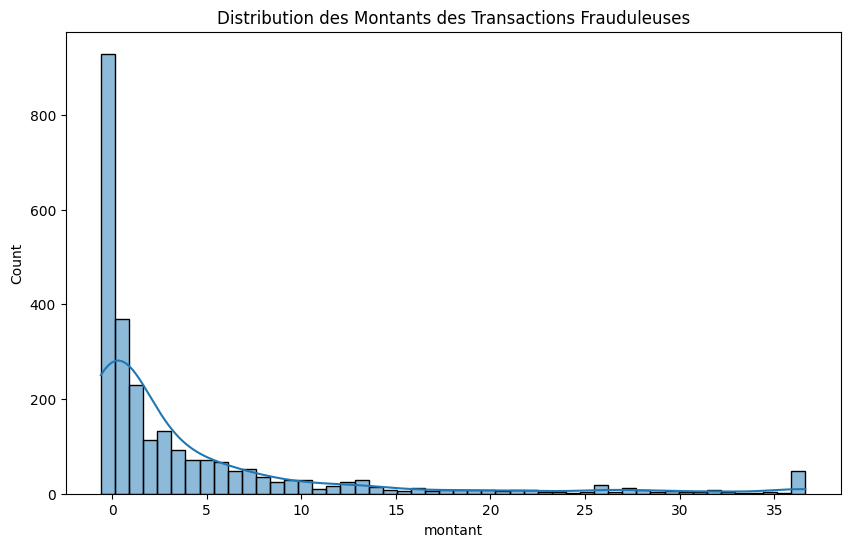

In [28]:
# Histogramme des montants frauduleux
plt.figure(figsize=(10,6))
sns.histplot(fraud_transactions['montant'], bins=50, kde=True)
plt.title('Distribution des Montants des Transactions Frauduleuses')
plt.show()


In [73]:
# Conversion de 'step' en heures
data['heure'] = (data['step'] % 24).astype(int)
fraud_transactions['heure'] = (fraud_transactions['step'] % 24).astype(int)

# Distribution des heures des transactions frauduleuses
heure_counts = fraud_transactions['heure'].value_counts().sort_index()
print("Distribution des Heures des Transactions Frauduleuses :")
print(heure_counts)


Distribution des Heures des Transactions Frauduleuses :
heure
0      74
1     118
2     126
3      88
4      72
5     102
6     106
7     112
8     108
9     119
10    125
11    118
12    129
13    128
14    119
15    113
16    123
17     99
18    113
19     84
20    132
21     99
22    101
23    111
Name: count, dtype: int64


<ipython-input-73-1e0fa569e263>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions['heure'] = (fraud_transactions['step'] % 24).astype(int)


In [74]:
# Résumé statistique des soldes avant et après les transactions frauduleuses
solde_stats = fraud_transactions[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].describe()
print("Résumé des Soldes des Transactions Frauduleuses :")
print(solde_stats)

# Comparaison avec les transactions non frauduleuses
non_fraud_transactions = data[data['isFraud'] == 0]
non_fraud_solde_stats = non_fraud_transactions[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].describe()
print("Résumé des Soldes des Transactions Non Frauduleuses :")
print(non_fraud_solde_stats)


Résumé des Soldes des Transactions Frauduleuses :
       oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
count    2619.000000     2619.000000     2619.000000     2619.000000
mean        0.175987       -0.272210       -0.227185        0.014010
std         0.873815        0.328515        0.786088        1.075496
min        -0.290314       -0.294020       -0.432464       -0.462641
25%        -0.252973       -0.294020       -0.432464       -0.462641
50%        -0.152768       -0.294020       -0.432464       -0.458084
75%         0.213005       -0.294020       -0.357198       -0.038536
max        12.613807        9.067679       13.883921       14.059730
Résumé des Soldes des Transactions Non Frauduleuses :
       oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
count   3.004761e+06    3.004761e+06    3.004761e+06    3.004761e+06
mean   -1.533931e-04    2.372626e-04    1.980182e-04   -1.221119e-05
std     1.000090e+00    1.000357e+00    1.000144e+00    9.999320e-01

###Résumé du Profil Typique d'une Transaction Frauduleuse

1. Caractéristiques Générales :

•	Moyenne du Montant des Transactions Frauduleuses: 4.26 unités monétaires
•	Écart-Type du Montant: 7.88 unités monétaires, ce qui montre une grande variabilité dans les montants des transactions frauduleuses.

2. Distribution Temporelle :

•	Heure des Transactions : Les transactions frauduleuses se produisent de manière relativement uniforme tout au long de la journée, avec une légère augmentation entre 12h00 et 14h00, et un pic à 20h00.

3. Types de Transactions :

•	Les transactions frauduleuses sont majoritairement associées au type de transaction représenté par une valeur moyenne de 1.49, ce qui pourrait correspondre à un type particulier de transaction (comme "CASH_OUT" ou "TRANSFER").

4. Soldes Avant et Après Transactions :

•	Soldes Avant Transaction (oldbalanceOrg) : Le solde moyen avant la transaction est très bas (0.18 unités), suggérant souvent que les comptes frauduleux ont des soldes faibles ou négatifs avant la transaction.
•	Soldes Après Transaction (newbalanceOrig) : Le solde après transaction est souvent négatif ou très proche de zéro (-0.27 unités en moyenne).
•	Soldes des Destinataires (oldbalanceDest & newbalanceDest) : Les soldes des comptes destinataires avant et après la transaction sont également négatifs ou très faibles, indiquant des anomalies potentielles dans les comptes récepteurs.

5. Comparaison avec les Transactions Non Frauduleuses :

•	Soldes : Contrairement aux transactions frauduleuses, les transactions non frauduleuses présentent des soldes moyens beaucoup plus stables et proches de zéro, avec une variabilité standardisée. Cela indique que les comptes impliqués dans les transactions frauduleuses ont des comportements de solde anormaux par rapport aux comptes non frauduleux.

6. Conclusion :

 Une transaction frauduleuse typique dans ce dataset se caractérise par une activité transactionnelle irrégulière, avec des montants variables, des soldes souvent négatifs ou proches de zéro avant et après la transaction, et une légère concentration d'activités pendant certaines heures de la journée, notamment aux alentours de midi et 20h00. Le type de transaction et les écarts dans les soldes sont des indicateurs clés de la fraude.


# Étape 4 : Préparation des Données pour la Modélisation

### Séparation des Features et de la Cible

In [31]:
data.head()

,step,typeTransaction,montant,NumeroCompte,oldbalanceOrg,newbalanceOrig,Agence,oldbalanceDest,newbalanceDest,isFraud,NomClient,dateCreation,heure
0,1,1,-0.553784,1231006815,-0.232033,-0.239787,M1979787155,-0.432464,-0.462641,0,Kamal,2020-01-01 01:00:00,1
1,1,1,-0.583482,1666544295,-0.283035,-0.287462,M2044282225,-0.432464,-0.462641,0,Hmidouch,2020-01-01 01:00:00,1
2,1,3,-0.589750,1305486145,-0.290252,-0.294020,C553264065,-0.432464,-0.462641,1,Wahida,2020-01-01 01:00:00,1
3,1,0,-0.589750,840083671,-0.290252,-0.294020,C38997010,-0.423264,-0.462641,1,Masouda,2020-01-01 01:00:00,1
4,1,1,-0.546975,2048537720,-0.276080,-0.283909,M1230701703,-0.432464,-0.462641,0,Lounes,2020-01-01 01:00:00,1


In [32]:
# Définition de X et y
X = data.drop('isFraud', axis=1)
y = data['isFraud']


In [33]:
# Vérifier les colonnes contenant des valeurs NaN
colonnes_nan = data.isnull().sum()

# Afficher les colonnes qui ont des valeurs NaN
colonnes_nan = colonnes_nan[colonnes_nan > 0]
print(colonnes_nan)

dateCreation    1
dtype: int64


In [34]:
# Afficher les lignes avec des valeurs NaN
lignes_avec_nan = data[data.isnull().any(axis=1)]
print(lignes_avec_nan)

         step  typeTransaction   montant  NumeroCompte  oldbalanceOrg  \
3007379   232                3  0.564309    1192660152      -0.285041   

         newbalanceOrig       Agence  oldbalanceDest  newbalanceDest  isFraud  \
3007379        -0.29402  C1210727974       -0.021166        0.064279        0   

        NomClient dateCreation  heure  
3007379    Chafik          NaN     16  


In [35]:
features_to_use = ['typeTransaction','montant', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

X = data[features_to_use]

### Division en Ensembles d'Entraînement et de Test

In [36]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [37]:
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (2405904, 6)
X_test shape is  (601476, 6)
y_train shape is  (2405904,)
y_test shape is  (601476,)


In [38]:
print(f"Taille de X: {len(X)}")
print(f"Taille de y: {len(y)}")


Taille de X: 3007380
Taille de y: 3007380


In [39]:
y_train.value_counts()

,count
isFraud,
0,2403809
1,2095


### Traitement du Déséquilibre des Classes avec SMOTE

Le SMOTE (Synthetic Minority Oversampling Technique) est utilisé pour générer des exemples synthétiques de la classe minoritaire.

In [40]:
# Supposons que X_train est votre DataFrame contenant les caractéristiques et y_train les labels
from imblearn.over_sampling import SMOTE



smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



In [41]:
# Vérifier la nouvelle distribution
y_train_resampled.value_counts()



,count
isFraud,
0,2403809
1,1201904


In [42]:
y_train_resampled.shape


(3605713,)

In [43]:

X_train_resampled.shape

(3605713, 6)

### Mise à l'échelle des caractéristiques/données

In [44]:
# StandardScaler for Data

scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train_resampled)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


In [45]:
y_train_resampled.tail()


,isFraud
3605708,1
3605709,1
3605710,1
3605711,1
3605712,1


In [46]:
# Enregistrer dans un fichier CSV
y_train_resampled.to_csv('y_train_resampled.csv', index=False)  # 'index=False' pour ne pas enregistrer les index

In [47]:
# Enregistrer dans un fichier CSV
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.to_csv('X_train_scaled.csv', index=False)  # 'index=False' pour ne pas enregistrer les index

In [48]:
from google.colab import files
files.download('y_train_resampled.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
from google.colab import files
files.download('X_train_scaled.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Étape 5 : Entraînement et évaluation du Modèle de Classification

### Entraînement du Modèle

Application de l'algorithme "Logistic Regression"

In [50]:
Model_LR = LogisticRegression()
Model_LR.fit(X_train_scaled, y_train_resampled)
y_pred_LR = Model_LR.predict(X_test_scaled)
y_pred_proba = Model_LR.predict_proba(X_test_scaled)[:,1]

# Quick evaluation
Train_Accuracy = Model_LR.score(X_train_scaled, y_train_resampled)
Test_Accuracy = Model_LR.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')


Training accuracy: 93.57 %
Testing accuracy: 98.21 %


The Evaluation

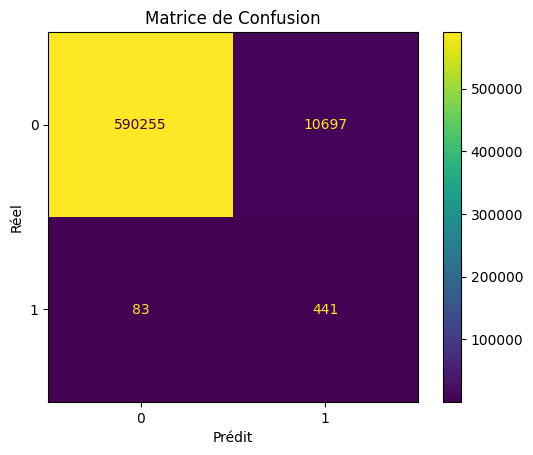

In [51]:
# Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_pred_LR)
ConfusionMatrixDisplay(CM, display_labels=data['isFraud'].unique()).plot()
plt.title('Matrice de Confusion')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

In [52]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    600952
           1       0.04      0.84      0.08       524

    accuracy                           0.98    601476
   macro avg       0.52      0.91      0.53    601476
weighted avg       1.00      0.98      0.99    601476



In [53]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_LR = accuracy_score(y_test, y_pred_LR)
print(f'➤➤➤ Accuracy Score : {Accuracy_LR * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_LR = precision_score(y_test, y_pred_LR)
print(f'➤➤➤ Precision Score : {Precision_LR * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_LR = recall_score(y_test, y_pred_LR)
print(f'➤➤➤ Recall Score : {Recall_LR * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_LR = f1_score(y_test, y_pred_LR)
print(f'➤➤➤ F1 Score : {F1_Score_LR * 100 : .2f} %\n')


ROC_AUC_LR = roc_auc_score(y_test, y_pred_LR)
print(f'➤➤➤ AUC_ROC : {ROC_AUC_LR * 100 : .2f} %\n')




➤➤➤ Accuracy Score :  98.21 %

➤➤➤ Precision Score :  3.96 %

➤➤➤ Recall Score :  84.16 %

➤➤➤ F1 Score :  7.56 %

➤➤➤ AUC_ROC :  91.19 %



Courbe ROC et Score AUC

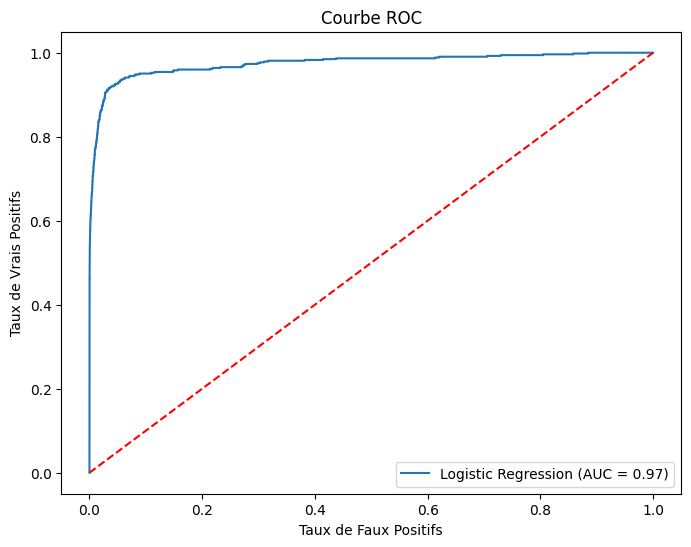

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % auc_score)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


Application de l'algorithme "Decision Tree"

In [55]:
Model_DT = DecisionTreeClassifier()
Model_DT.fit(X_train_scaled, y_train_resampled)
y_pred_DT = Model_DT.predict(X_test_scaled)
y_pred_proba = Model_DT.predict_proba(X_test_scaled)[:,1]

# Quick evaluation
Train_Accuracy = Model_DT.score(X_train_scaled, y_train_resampled)
Test_Accuracy = Model_DT.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')
print(y_pred_proba)

Training accuracy: 100.00 %
Testing accuracy: 99.89 %
[0. 0. 0. ... 0. 0. 0.]


Sauvegarder le modele en fichier .pkl


In [56]:
import pickle

In [57]:
# Sauvegarde du modèle dans un fichier .pkl
with open('model_decision_tree.pkl', 'wb') as file:
    pickle.dump(Model_DT, file)

In [58]:
from google.colab import files
files.download('model_decision_tree.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Evaluation

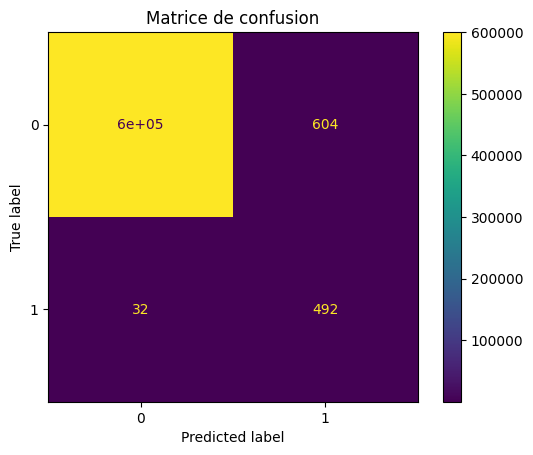

In [59]:
# Matrice de confusion

CM = confusion_matrix(y_true=y_test, y_pred=y_pred_DT)
ConfusionMatrixDisplay(CM, display_labels=data['isFraud'].unique()).plot()
plt.title('Matrice de confusion')
plt.show()

In [60]:


print(classification_report(y_test, y_pred_DT))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00    600952
           1       0.45      0.94      0.61       524

    accuracy                           1.00    601476
   macro avg       0.72      0.97      0.80    601476
weighted avg       1.00      1.00      1.00    601476



In [61]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_DT = accuracy_score(y_test, y_pred_DT)
print(f'➤➤➤ Accuracy Score : {Accuracy_DT * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_DT = precision_score(y_test, y_pred_DT)
print(f'➤➤➤ Precision Score : {Precision_DT * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_DT = recall_score(y_test, y_pred_DT)
print(f'➤➤➤ Recall Score : {Recall_DT * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_DT = f1_score(y_test, y_pred_DT)
print(f'➤➤➤ F1 Score : {F1_Score_DT * 100 : .2f} %\n')


ROC_AUC_DT = roc_auc_score(y_test, y_pred_DT)
print(f'➤➤➤ AUC_ROC : {ROC_AUC_DT * 100 : .2f} %\n')

➤➤➤ Accuracy Score :  99.89 %

➤➤➤ Precision Score :  44.89 %

➤➤➤ Recall Score :  93.89 %

➤➤➤ F1 Score :  60.74 %

➤➤➤ AUC_ROC :  96.90 %



Courbe ROC et Score AUC

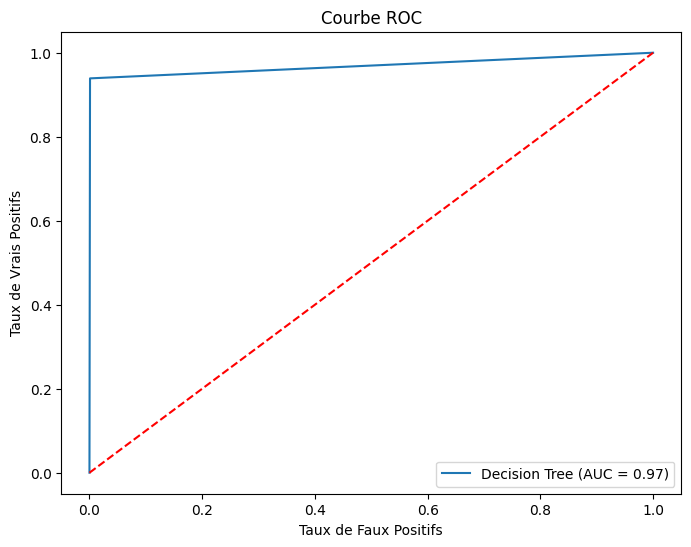

In [62]:


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Decision Tree (AUC = %0.2f)' % auc_score)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()




*   AUC Score : Un score proche de 1 indique une excellente capacité de discrimination du modèle.




Evaluation des modeles

In [63]:
evaluation = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree'],
                           'Accuracy': [(Accuracy_LR*100), (Accuracy_DT*100)]})

evaluation

,Model,Accuracy
0,Logistic Regression,98.207742
1,Decision Tree,99.894260


# Étape 6 : Détection des Clients Non Frauduleux Similaires au Profil Frauduleux

### Prédiction des Probabilités sur l'Ensemble Complet

In [65]:
data.head()

,step,typeTransaction,montant,NumeroCompte,oldbalanceOrg,newbalanceOrig,Agence,oldbalanceDest,newbalanceDest,isFraud,NomClient,dateCreation,heure
0,1,1,-0.553784,1231006815,-0.232033,-0.239787,M1979787155,-0.432464,-0.462641,0,Kamal,2020-01-01 01:00:00,1
1,1,1,-0.583482,1666544295,-0.283035,-0.287462,M2044282225,-0.432464,-0.462641,0,Hmidouch,2020-01-01 01:00:00,1
2,1,3,-0.589750,1305486145,-0.290252,-0.294020,C553264065,-0.432464,-0.462641,1,Wahida,2020-01-01 01:00:00,1
3,1,0,-0.589750,840083671,-0.290252,-0.294020,C38997010,-0.423264,-0.462641,1,Masouda,2020-01-01 01:00:00,1
4,1,1,-0.546975,2048537720,-0.276080,-0.283909,M1230701703,-0.432464,-0.462641,0,Lounes,2020-01-01 01:00:00,1


In [66]:
# Récupérer les noms de colonnes avant le scaling
original_feature_names = X_train.columns

# Créez un DataFrame à partir de X_train_scaled avec les noms de colonnes originaux
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=original_feature_names)

In [70]:
features_to_use2 = ['montant', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'typeTransaction','isFraud']

data2= data[features_to_use2]

# Extraire les caractéristiques en tant que tableau numpy
non_fraud_features_np = data2.loc[data2['isFraud'] == 0, data2.columns != 'isFraud'].values

non_fraud_data = data[data['isFraud'] == 0]

# Prédire les probabilités en utilisant le tableau numpy
fraud_probabilities = Model_DT.predict_proba(non_fraud_features_np)[:, 1]

if 'fraud_probability' not in data.columns:
    data['fraud_probability'] = np.nan

# Mettre à jour la colonne 'fraud_probability' en utilisant .loc
data.loc[data['isFraud'] == 0, 'fraud_probability'] = fraud_probabilities





### Identification des Transactions Suspectes

In [71]:
suspicious_transactions = non_fraud_data[(non_fraud_data['fraud_probability'] >= 0.8) ]

suspicious_transactions[['fraud_probability', 'montant', 'typeTransaction', 'NumeroCompte','NomClient','dateCreation','Agence']].head()


,fraud_probability,montant,typeTransaction,NumeroCompte,NomClient,dateCreation,Agence
14,1.0,-0.575161,1,1026483832,Atiq,2020-01-01 01:00:00,M1635378213
83,1.0,-0.121708,3,1443967876,Mahjouba,2020-01-01 01:00:00,C392292416
108,1.0,-0.403858,0,1740826931,Amat Errahmane,2020-01-01 01:00:00,C97730845
141,1.0,-0.576753,1,361380654,Charifa,2020-01-01 01:00:00,M631673932
221,1.0,-0.561724,1,1108889615,Refki,2020-01-01 01:00:00,M1275028674


In [72]:
print(f"Nombre de transactions suspectes détectées : {suspicious_transactions.shape[0]}")


Nombre de transactions suspectes détectées : 297937


# Étape 8 : Génération d'Alertes pour les Transactions Suspectes

### Création d'Alertes sous Forme de Tickets

In [75]:
alert_fields = ['NomClient', 'NumeroCompte', 'dateCreation', 'montant', 'Agence']

alerts = suspicious_transactions[alert_fields]

In [76]:
# Exporter les alertes vers un fichier CSV
alerts.to_csv('alerts.csv', index=False)